<a href="https://colab.research.google.com/github/saranshikens/Epoch-Tasks/blob/main/Task_Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**$\Huge \text{TASK SESSION-2}$**  
<br>
●	Overview of Forward Pass and Backpropagation  
●	Different Types of Activation Functions  
●	Optimizers  
●	Dropout, Normalization and Regularization  
●	Greedy Layer-Wise Pre-Training  
●	Practical Aspects  
●	Mixed Precision Training  
<br>  
$\large \text{By - Saransh}$



---



**$\huge \text{STEP-1 DATA CLEANING AND INITIAL INSIGHTS}$**  

**$\LARGE \text{Loading the Dataset}$**  
I will be using Kaggle's API machinery to load the datasets.

In [ ]:
# Setting up Kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!bash -c "kaggle datasets download -d gauravduttakiit/resume-dataset > /dev/null 2>&1"

In [ ]:
!unzip -q resume-dataset.zip

In [ ]:
import numpy as np
import pandas as pd



---



**$\LARGE \text{Reading the data}$**

In [ ]:
df = pd.read_csv("/content/UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."




---



**$\LARGE \text{INSIGHTS INTO THE DATA}$**

To gain some quick insights about the data, we use the .describe() method.

In [ ]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [ ]:
df.shape

(962, 2)

The count for both features is equal to the number of samples.  
So, we conclude that the data has no missing values, hence will need no imputing.

We need to extract useful features from the resume text.  
For that, it is necessary that we have knowledge of the job categories themselves.

In [ ]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

Needless to say, for the majority of the jobs, three features play the most vital part in getting shortlisted.  


*   Skills: Whether the candidate is familiar with the tech tools/stack used in   
the job.
*   Projects: Whether the candidate has used his knowlegde in building projects   
that may be employable in the respective industry.
*   Experience: Ofcourse, if the candidate already has some industry experience   
under his belt, it will increase his chances of getting shortlisted.






We are still not quite familiar with how exactly the resume texts look like in this dataset.  
Let us take a look at two of them, so we know what we are dealing with.



---



**$\Large \text{DATA SCIENCE RESUME}$**

In [ ]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

**$\Large \text{HUMAN RESOURCES RESUME}$**

In [ ]:
hr_resumes = df[df['Category'] == 'HR']
print(hr_resumes['Resume'].iloc[0])

TECHNICAL SKILLS â¢ Typewriting â¢ TORA â¢ SPSSEducation Details 
January 2017 MBA  Chidambaram, Tamil Nadu SNS College of Engineering
January 2014 HSC   at SAV Higher Secondary School
 MBA   SNS College of Engineering
 SSLC Finance  at Kamaraj Matriculation School
HR 


Skill Details 
Human resource, Finance- Exprience - Less than 1 year monthsCompany Details 
company - 
description - 




---



**$\LARGE \text{STRATEGY FOR DATA CLEANING}$**  
Our hypothesis of the three features playing a major role seems plausible.  
To make the resume texts more appropriate and reliable for nlp, we can try to  
remove information that is not required. Namely, we will remove these:

**$\Large \text{1. \n, \r}$**  
Looking at the Data Science Resume, we can observe '\n' and '\r' characters.  
The applicant most likely used a code editor to type out his resume, hence the  
usage of these characters.  
We will be removing these.

**$\Large \text{2. Non-Alphabetic Characters}$**    
In the HR Resume, we can see some unrecognizable characters, and a few dates.  
These are absolutely not required for the shortlisting process.  
This step will also remove the duration of a previous work experience/internship.  
I would argue that recuiters only need to know whether you have had a past  
experience, not its exact duration.  
Some internships are 6 months, some are 2 months.  
The only useful information that we will lose out on is GPA of a candidate.

In [ ]:
import re

def clean_resume(resume):
    # Remove '\r' and '\n'
    cleaned_resume = resume.replace('\r', '').replace('\n', ' ')
    # Remove characters not in the allowed set (alphanumeric and whitespace)
    cleaned_resume = re.sub(r'[^a-zA-Z\s]', '', cleaned_resume)
    return cleaned_resume

df['Cleaned_Resume'] = df['Resume'].apply(clean_resume)
df['Resume'] = df['Cleaned_Resume']
df = df.drop('Cleaned_Resume', axis=1)
df.head()

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas nu...
1,Data Science,Education Details May to May BE UITRGPV D...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA...
4,Data Science,Education Details MCA YMCAUST Faridabad ...


In [ ]:
df['Resume'][1]

'Education Details  May  to May  BE   UITRGPV Data Scientist   Data Scientist  Matelabs Skill Details  Python Exprience  Less than  year months Statsmodels Exprience   months AWS Exprience  Less than  year months Machine learning Exprience  Less than  year months Sklearn Exprience  Less than  year months Scipy Exprience  Less than  year months Keras Exprience  Less than  year monthsCompany Details  company  Matelabs description  ML Platform for business professionals dummies and enthusiasts A Koramangala th block AchievementsTasks behind sukh sagar Bengaluru India                               Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedincominadityarathore bb                           Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holtwinter and Prophet Worked on met

In [ ]:
count_cgpa_gpa = df['Resume'].apply(lambda tokens: 'cgpa' in tokens or 'gpa' in tokens or 'CGPA' in tokens or 'GPA' in tokens).sum()
print(count_cgpa_gpa)

7


Out of 962 candidates, only 7 mentioned their GPA. This is highly unbalanced.  
Hence by removing all numeric values, we do not lose out on any important information.  
So, our data cleaning steps remain valid.



---



First, let us import a model capable of natural language processing.  
Spacy library provides many prebuilt models.   
I will be using the lightest of them of all 'en_core_web_sm'.

In [ ]:
import spacy

# Load the English model
nlp = spacy.load('en_core_web_sm')

In [20]:
# tokenize all the resume texts, storing them as a  separate feature
df['Tokenized_Resume'] = df['Resume'].apply(lambda x: [token.text for token in nlp(x)])

In [21]:
df.head()

,Category,Resume,Tokenized_Resume
0,Data Science,Skills Programming Languages Python pandas nu...,"[Skills, , Programming, Languages, Python, pa..."
1,Data Science,Education Details May to May BE UITRGPV D...,"[Education, Details, , May, , to, May, , BE..."
2,Data Science,Areas of Interest Deep Learning Control System...,"[Areas, of, Interest, Deep, Learning, Control,..."
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA...,"[Skills, , R, , Python, , SAP, HANA, , Tab..."
4,Data Science,Education Details MCA YMCAUST Faridabad ...,"[Education, Details, , MCA, , YMCAUST, , ..."




---



Now we need to classify the tokens as 'Skills', 'Experience' and 'Projects'.  
To achieve this, I am using a very simple (and risky) approach.  
While typing their resumes, each candidate must have given headings, such as  
'Education', 'Skills', 'Past Experience', etc.  
For a given candidate, I will search all the tokens for our three keywords.  
After this, I will assume that all the tokens between Keyword 1 and Keyword 2  
belong to Keyword 1.  
The approach is very simple, but it depends on the candidates....what titles  
they actually used.   
If our keywords are not in the resume, the approach simply fails.  
This was the primary reason behind the data cleaning steps.  
Removing irrelevant data will make sure that the tokens found between any two  
keywords will be sufficiently related to the first keyword.  

In [22]:
def extract_sections(resume_tokens):
    sections = {"Skills": [], "Work Experience": [], "Projects": []}
    current_section = None
    section_keywords = {
        ("skill", "skills"): "Skills", # we account for both lower case and camel case
        ("experience", "work experience"): "Work Experience",
        ("project", "projects"): "Projects"
    }

    # Join tokens back into a string for easier pattern matching
    resume_text = " ".join(resume_tokens).lower()

    #  we use regular expressions to find sections based on keywords
    for keywords, section_name in section_keywords.items():
        pattern = r"({})".format("|".join(keywords))
        matches = list(re.finditer(pattern, resume_text))

        if matches:
            # assuming the text after the first match of a keyword belongs to that section
            start_index = matches[0].end()
            # finding the start of the next potential section to define the end of the current one
            next_section_starts = [re.search(other_pattern, resume_text[start_index:]) for other_keywords, other_pattern in section_keywords.items() for other_pattern in [r"({})".format("|".join(other_keywords))]]
            next_section_starts = [match.start() + start_index for match in next_section_starts if match]

            end_index = min(next_section_starts) if next_section_starts else len(resume_text)

            sections[section_name] = [resume_text[start_index:end_index].strip()]

    return sections

df['Extracted_Features'] = df['Tokenized_Resume'].apply(extract_sections)
df.head()

,Category,Resume,Tokenized_Resume,Extracted_Features
0,Data Science,Skills Programming Languages Python pandas nu...,"[Skills, , Programming, Languages, Python, pa...",{'Skills': ['s programming languages python ...
1,Data Science,Education Details May to May BE UITRGPV D...,"[Education, Details, , May, , to, May, , BE...",{'Skills': ['details python exprience less...
2,Data Science,Areas of Interest Deep Learning Control System...,"[Areas, of, Interest, Deep, Learning, Control,...",{'Skills': ['s programming matlab python and j...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA...,"[Skills, , R, , Python, , SAP, HANA, , Tab...",{'Skills': ['s r python sap hana table...
4,Data Science,Education Details MCA YMCAUST Faridabad ...,"[Education, Details, , MCA, , YMCAUST, , ...",{'Skills': ['details data structure exprienc...




---



**$\LARGE \text{WORD EMBEDDINGS}$**

Text cannot be fed into neural networks, so we will use models from scikit learn for this task.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Concatenate extracted sections for each resume
df['Concatenated_Features'] = df['Extracted_Features'].apply(lambda x: ' '.join([' '.join(section) for section in x.values()]))

# Initialize TF-IDF Vectorizer
# You might want to adjust parameters like max_features, min_df, max_df, ngram_range
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the concatenated features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Concatenated_Features'])

# Convert to DataFrame for easier inspection (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df.head()

,aaa,ab,abacus,abap,ability,able,abridged,academia,academic,academy,...,young,yrs,zaggle,zambia,zd,zensar,zero,zhypility,zone,zookeeper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.049473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.11122,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




---



**$\Large \text{SVD AND PCA}$**

As we can see from above, there are 3810 features (frankly speaking, most of  
them are completely useless, as we can see from all these 0.0's).  
Using all of them will be a waste of computation power.  
So we will use Singular Value Decomposition to get the number of principle  
components, that are actually useful in determining the Category.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

X = tfidf_df - tfidf_df.mean()
U, S, VT = np.linalg.svd(X, full_matrices=False)

# S is a diagonal matrix. The diagonal elements in S give us the proportion in
# which each component explains the variance of the original data. For convenience
# and interpretability we transform the proportions into ratios.
S = (S/np.sum(S))*100

S_df = pd.DataFrame({
    'Component': [f'S{i+1}' for i in range(len(S))],
    'Percent Explained Variance': np.round(S, 2)
})

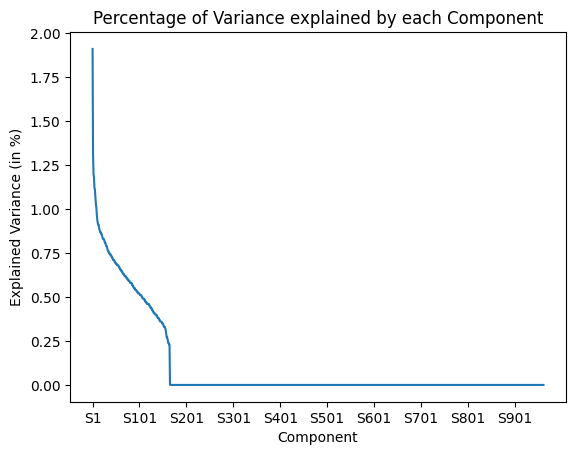

In [25]:
sns.lineplot(data=S_df, x='Component', y='Percent Explained Variance')
plt.title("Percentage of Variance explained by each Component")
plt.xticks(ticks=range(0, 1000, 100))
plt.ylabel("Explained Variance (in %)")
plt.show()



---



As we can see from the plot, after 175-ish, the components explain nearly 0%  
 (if not 0%) of the variance in the data.  
So, during PCA we will generate only 175 principle components.  
This reduces the number of features from 3810 to 175, a drop of more than 95%!!

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_tfidf_df = scaler.fit_transform(tfidf_df)

pca = PCA(n_components=175)
tfidf_pca = pca.fit_transform(scaled_tfidf_df)

tfidf_pca_df = pd.DataFrame(tfidf_pca, columns=[f'PC{i+1}' for i in range(tfidf_pca.shape[1])])



---



**$\huge \text{STEP-2 TRAINING THE MODEL}$**

We will employ the usual techniques of batch normalization, dropout and early  
stopping to counter overfitting.  
Adam has been chosen as the optimizer, and the width of each hidden layer is  
low-key arbitrary.  
We will use the word embeddings to classify the category, so we will use binary  
cross entropy as loss function and accuracy as loss metric.  
If for a candidate, the predicted category matches the applied-for category, he  
will be shortlisted.


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data into training, validating and testing sets

X_temp, X_test, y_temp, y_test = train_test_split(tfidf_pca_df, df['Category'], test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


In [41]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[tfidf_pca_df.shape[1]]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(df['Category'].nunique(), activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


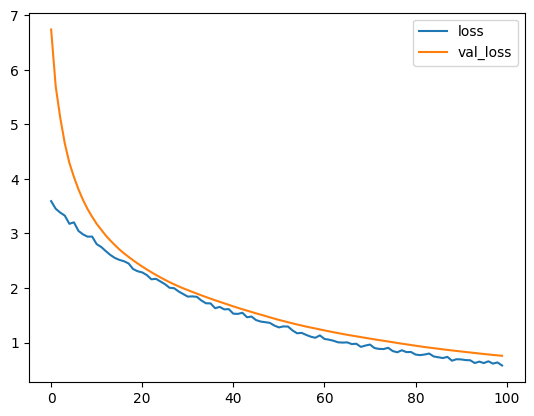

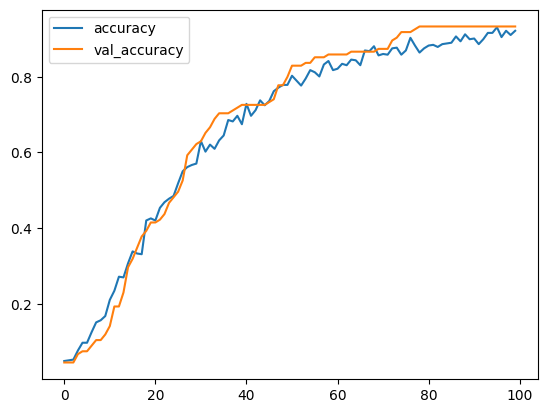

In [42]:
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_val_encoded = encoder.transform(y_val.values.reshape(-1, 1))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# if the accuract drops continuously for more than 10 epochs, we will stop training
# accuracy is said to change if it differs by atleast 0.001
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train_encoded,
    validation_data=(X_val, y_val_encoded),
    batch_size=256,
    epochs=100,
    callbacks=[early_stopping],
    verbose=0,
)

# Plot the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();



---



**$\huge \text{STEP-3 EVALUATION}$**  
We will test our model on previously split test data, and evaluate its  
performance using classification report and confusion matrix.

In [43]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_encoded = model.predict(X_test)

# Decode the one-hot encoded predictions
y_pred = encoder.inverse_transform(y_pred_encoded)

# Flatten the predicted labels to match the shape of y_test
y_pred = y_pred.flatten()

print(classification_report(y_test, y_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
                           precision    recall  f1-score   support

                 Advocate       1.00      0.33      0.50         6
                     Arts       1.00      1.00      1.00         8
       Automation Testing       1.00      0.86      0.92         7
               Blockchain       1.00      1.00      1.00        11
         Business Analyst       0.90      1.00      0.95         9
           Civil Engineer       0.91      0.91      0.91        11
             Data Science       1.00      1.00      1.00        11
                 Database       0.82      1.00      0.90         9
          DevOps Engineer       0.94      0.89      0.92        19
         DotNet Developer       0.85      1.00      0.92        11
            ETL Developer       1.00      1.00      1.00         9
   Electrical Engineering       1.00      1.00      1.00         9
                       HR       1.00      1.00      1.00        17
                   Had



---



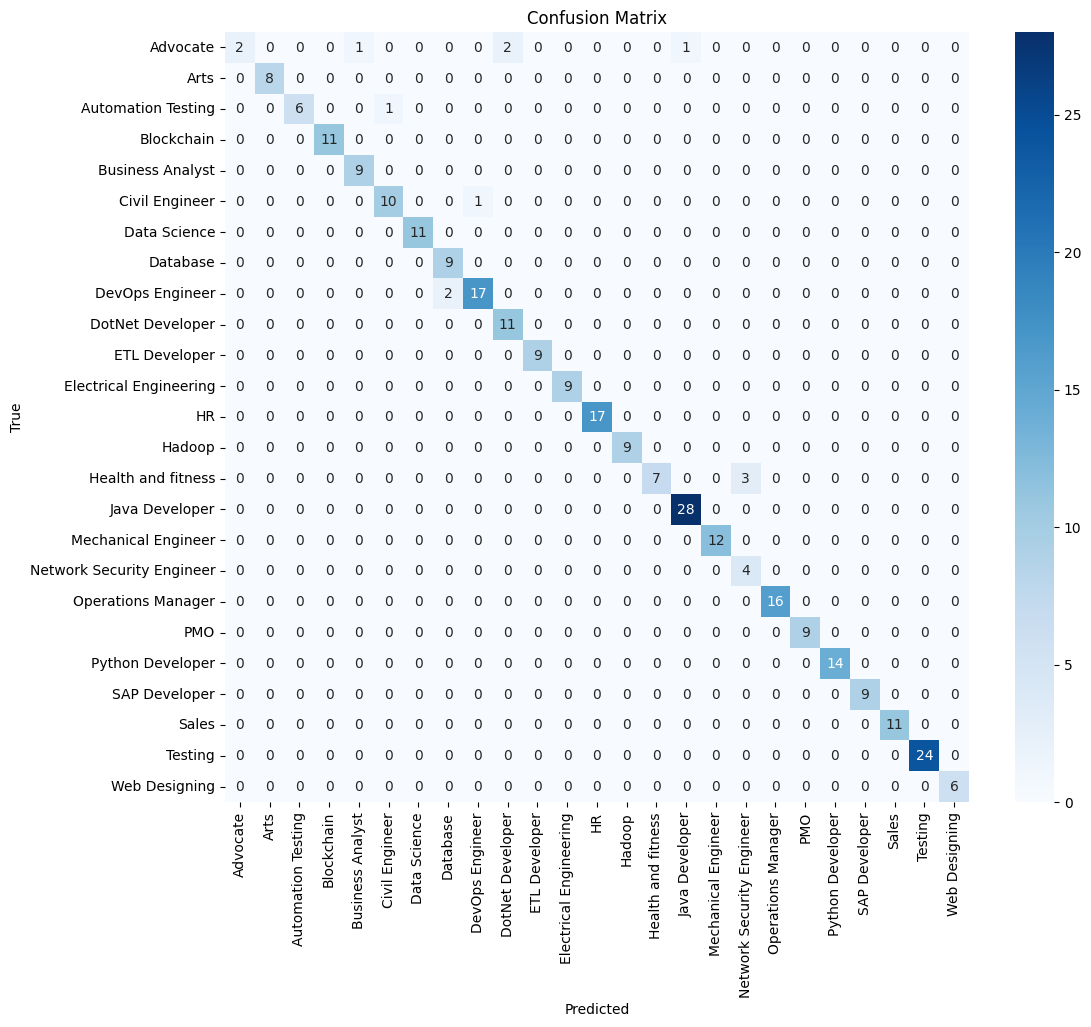

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Get the class labels
classes = np.unique(y_test)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**$\huge \text{FOR THE USER}$**  

In [45]:
# Enter your resume text
resume = "Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib) * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Cluster Analysis, Word Embedding, . * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka,- Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigation"
# Enter the job category that you are applying for
# NOTE:- It should be one of the following (case-sensitive):
# 'Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
# 'Mechanical Engineer', 'Sales', 'Health and fitness',
# 'Civil Engineer', 'Java Developer', 'Business Analyst',
# 'SAP Developer', 'Automation Testing', 'Electrical Engineering',
# 'Operations Manager', 'Python Developer', 'DevOps Engineer',
# 'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
# 'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'
category = "Data Science"

In [46]:
df_user = pd.DataFrame({
    'Category': [category],
    'Resume': [resume]
})

In [47]:
# processing df_user like we did before
df_user['Cleaned_Resume'] = df_user['Resume'].apply(clean_resume)
df_user['Resume'] = df_user['Cleaned_Resume']
df_user = df_user.drop('Cleaned_Resume', axis=1)
df_user['Tokenized_Resume'] = df_user['Resume'].apply(lambda x: [token.text for token in nlp(x)])
df_user['Extracted_Features'] = df_user['Tokenized_Resume'].apply(extract_sections)
df_user['Concatenated_Features'] = df_user['Extracted_Features'].apply(lambda x: ' '.join([' '.join(section) for section in x.values()]))
tfidf_matrix_user = tfidf_vectorizer.transform(df_user['Concatenated_Features'])

In [48]:
# processing tfidf_matrix_user like we did before
tfidf_matrix_user = tfidf_vectorizer.transform(df_user['Concatenated_Features'])
tfidf_df_user = pd.DataFrame(tfidf_matrix_user.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_user = tfidf_df_user.reindex(columns=tfidf_df.columns, fill_value=0)
scaled_tfidf_df_user = scaler.transform(tfidf_df_user)
tfidf_pca_user = pca.transform(scaled_tfidf_df_user)
tfidf_pca_df_user = pd.DataFrame(tfidf_pca_user, columns=[f'PC{i+1}' for i in range(tfidf_pca_user.shape[1])])
category_pred_encoded = model.predict(tfidf_pca_df_user)
category_pred_decoded = encoder.inverse_transform(category_pred_encoded)


if category_pred_decoded[0][0] == category:
  print("Congrats! You have been shortlisted for the interview stage.")
else:
  print("Sorry! You were not shortlisted. Better luck next time!!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Congrats! You have been shortlisted for the interview stage.
